# Influence function estimation at Univerity of Iowa
xchong@lbl.gov, 16th July 2024
awojdyla@lbl.gov

We use 5V as the reference, apply random voltages to all cells and record the result. The data seems to be very noisy.

In [2]:
# load the influence funtion from file
import numpy as np
import scipy.io as sc
import matplotlib.pyplot as plt  
import math


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# 1 extract the influence function from the npy files

In [2]:
#load the data
ifs_file_name = "./random5V/seg3A_cells_1-16_randomVolts_figMaps_5.0V_ref.npy"
influence_waves_3D_pV = np.load(ifs_file_name)

voltMaps_filename = "./random5V/seg3A_cells_1-16_randomVolts_voltMaps_5.0V_ref.npy"
voltMaps_V = np.load(voltMaps_filename)
print(influence_waves_3D_pV.shape,voltMaps_V.shape)

(406, 354, 1663) (406, 24)


Text(0, 0.5, 'k-th measurement')

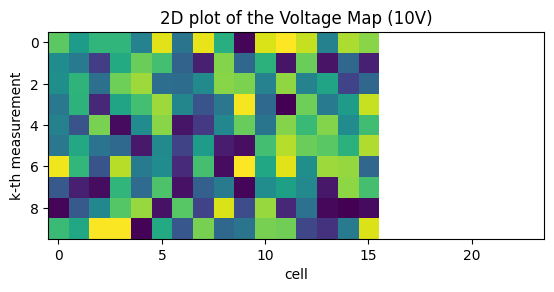

In [3]:
plt.imshow(voltMaps_V[:10,:])
plt.title("2D plot of the Voltage Map (10V)")
plt.xlabel("cell")
plt.ylabel("k-th measurement")

Text(0, 0.5, 'y-axis position (mm)')

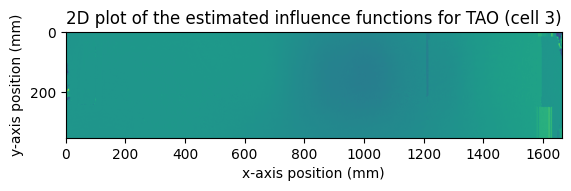

In [4]:
#2D plot of cell 3
plt.imshow(influence_waves_3D_pV[2,:,:])
plt.title("2D plot of the estimated influence functions for TAO (cell 3)")
plt.xlabel("x-axis position (mm)")
plt.ylabel("y-axis position (mm)")

Text(0, 0.5, '(um/10V)')

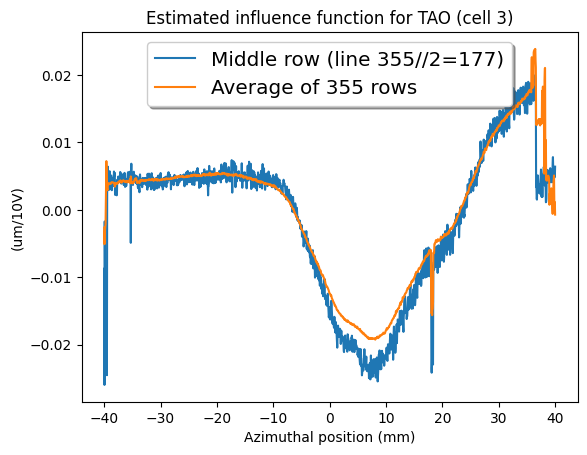

In [5]:
#1D plot of cell 3
fig,ax = plt.subplots()
cell_num = 2
xaxis = np.linspace(-40,40,influence_waves_3D_pV.shape[2])
yaxis = influence_waves_3D_pV[cell_num,177,:]
yaxis_avg = np.mean(influence_waves_3D_pV[cell_num,:,:], axis = 0)

plt.plot(xaxis,yaxis,label='Middle row (line 355//2=177)')
plt.plot(xaxis,yaxis_avg,label='Average of 355 rows')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')


plt.title("Estimated influence function for TAO (cell 3)")
ax.set_xlabel("Azimuthal position (mm)")
ax.set_ylabel("(um/10V)")

Text(0, 0.5, '(um/10V)')

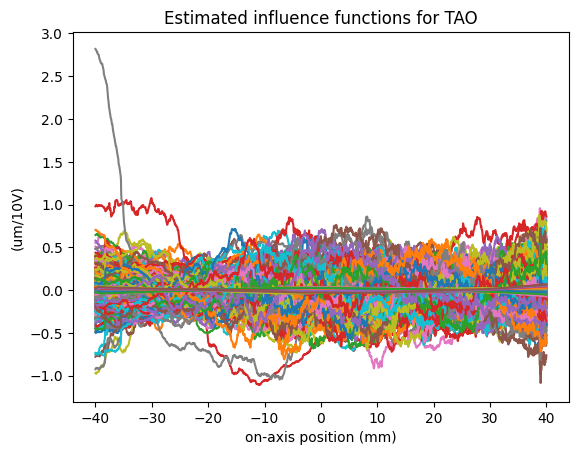

In [6]:
# plot the raw data, which contains artifcats due to the rectangular
fig,ax = plt.subplots()
xaxis = np.linspace(-40,40,influence_waves_3D_pV.shape[2])
for i in range(influence_waves_3D_pV.shape[0]):
    #calculate the average of the all rows     
    each_yaxis_avg = np.mean(influence_waves_3D_pV[i,:,:], axis = 0)
    plt.plot(xaxis,each_yaxis_avg)

plt.title("Estimated influence functions for TAO")
plt.xlabel("on-axis position (mm)")
plt.ylabel("(um/10V)")

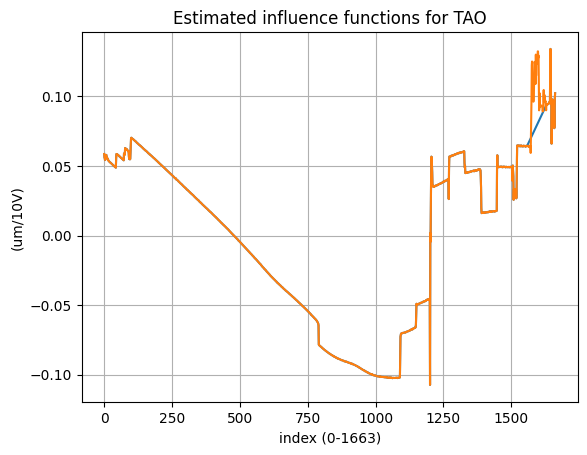

In [7]:
# interpolate the data to remove the artifacts
each_yaxis_avg = np.mean(influence_waves_3D_pV[14,:,:], axis = 0)
data_cleaned = each_yaxis_avg
idx = np.arange(len(each_yaxis_avg))
mask =  (idx<1560) | (idx>1630)
data_cleaned=np.interp(idx,idx[mask],each_yaxis_avg[mask])

plt.plot(data_cleaned)
plt.plot(each_yaxis_avg)
plt.xlabel("index (0-1663)")
plt.ylabel("(um/10V)")
plt.title("Estimated influence functions for TAO")  
plt.grid()
plt.show()

Text(0, 0.5, '(um/10V)')

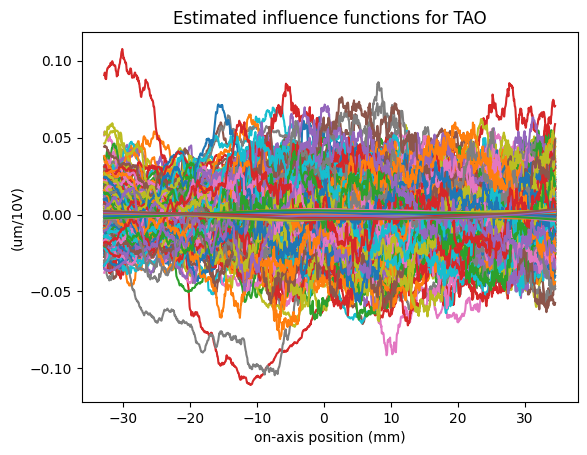

In [9]:
# save the cleaned data
y_mm = np.linspace(-40,40,1664)
crop_start = 150
crop_end = 1550
y_mm = y_mm[crop_start:crop_end]
y_mm = np.expand_dims(y_mm, axis=1)

fig,ax = plt.subplots()
xaxis = np.linspace(-40,40,influence_waves_3D_pV.shape[2])
interp_start = 1560
interp_end = 1630

crop_start = 150
crop_end = 1550
influence_waves_pV=[]
for i in range(influence_waves_3D_pV.shape[0]):
    #calculate the average of the all rows     
    each_yaxis_avg_um = np.mean(influence_waves_3D_pV[i,:,:], axis = 0)

    # interpolate the values between the start and end
    idx = np.arange(len(each_yaxis_avg_um))
    mask =  (idx<interp_start) | (idx>interp_end)
    data_cleaned_um = np.interp(idx,idx[mask],each_yaxis_avg_um[mask])

    #remove the leftmost and rightmost points
    influence_waves_pV.append(data_cleaned_um[crop_start:crop_end])
    #plt.plot(xaxis[crop_start:crop_end],data_cleaned_um[crop_start:crop_end])
influence_waves_umpV = np.array(influence_waves_pV).transpose((1,0))/10
plt.plot(y_mm,influence_waves_umpV )
np.save("./random5V/result.npy", influence_waves_umpV)
plt.title("Estimated influence functions for TAO")
plt.xlabel("on-axis position (mm)")
plt.ylabel("(um/10V)")

In [4]:
# load the data from txt files
input = np.load("./random5V/seg3A_cells_1-16_randomVolts_voltMaps_5.0V_ref.npy")
result = np.load("./random5V/result.npy")

input = input[:,:16]
result = result.transpose((1,0))

print(input.shape, result.shape)

(406, 16) (406, 1400)


In [5]:
print(result)

[[ 0.00400724  0.00400602  0.00400879 ...  0.00786593  0.00789262
   0.00791931]
 [-0.00143547 -0.00143573 -0.00142485 ... -0.00211594 -0.00212067
  -0.0021254 ]
 [ 0.00043051  0.00044102  0.00044552 ...  0.00028481  0.00028735
   0.00028989]
 ...
 [ 0.00112681  0.00113091  0.00113513 ...  0.00312063  0.00313171
   0.0031428 ]
 [ 0.00145935  0.00145392  0.00144401 ...  0.00322211  0.00323577
   0.00324942]
 [ 0.00230498  0.00229667  0.00228815 ...  0.00421368  0.0042297
   0.00424573]]
